In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")
df.describe()
df.head(10)

In [ ]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
x = df.drop(columns = ['Outcome'])
# x
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.select_dtypes(include=np.number).columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()

    return df_std

x = z_score(x)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,\
    y_train, y_test = train_test_split(x, y,
                                       test_size=0.4,
                                       random_state=37)

In [ ]:
from sklearn import linear_model

reg = linear_model.LogisticRegression()

In [ ]:
reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn import metrics

print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y_test, y_pred)*100)
print("Logistic Regression model precision(in %):",
      metrics.precision_score(y_test, y_pred)*100)
print("Logistic Regression model recall(in %):",
      metrics.recall_score(y_test, y_pred)*100)
print("Logistic Regression model f-1 score(in %):",
      metrics.f1_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 79.87012987012987
Logistic Regression model precision(in %): 80.0
Logistic Regression model recall(in %): 58.18181818181818
Logistic Regression model f-1 score(in %): 67.36842105263158


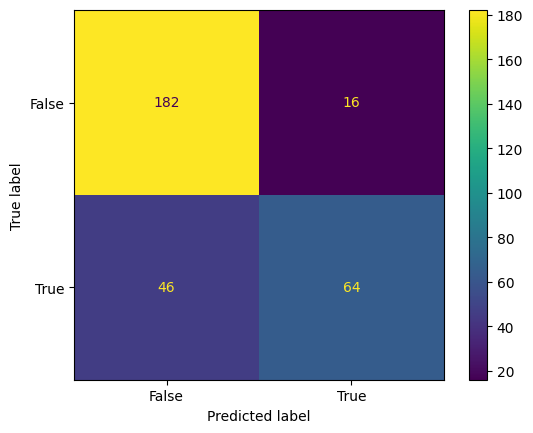

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()